In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 942.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
   

In [4]:
## importing necessary libraries
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


Found 923 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


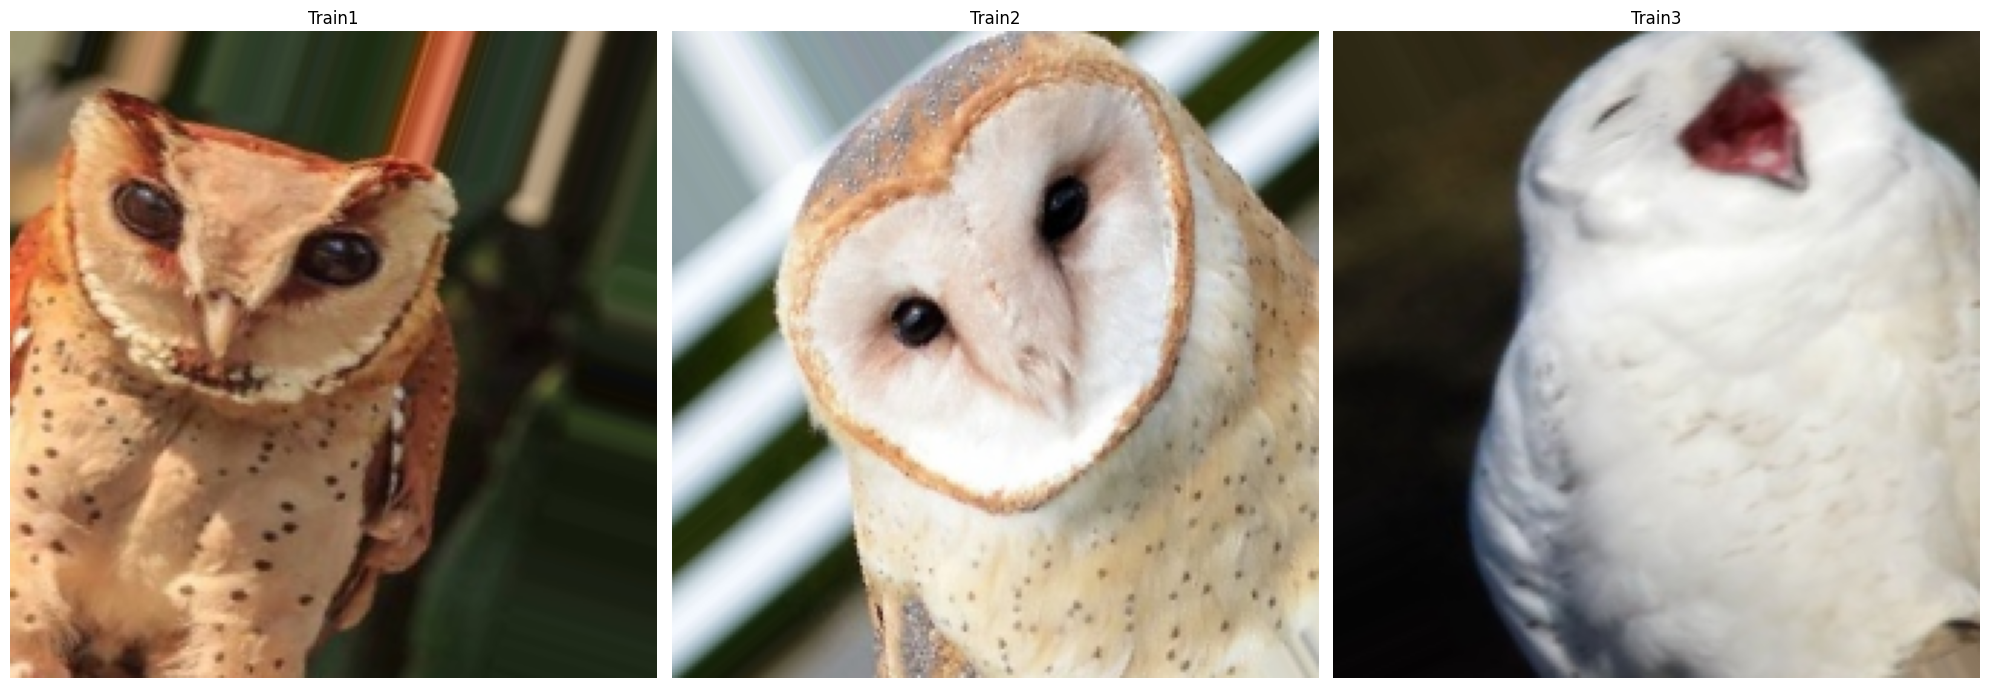

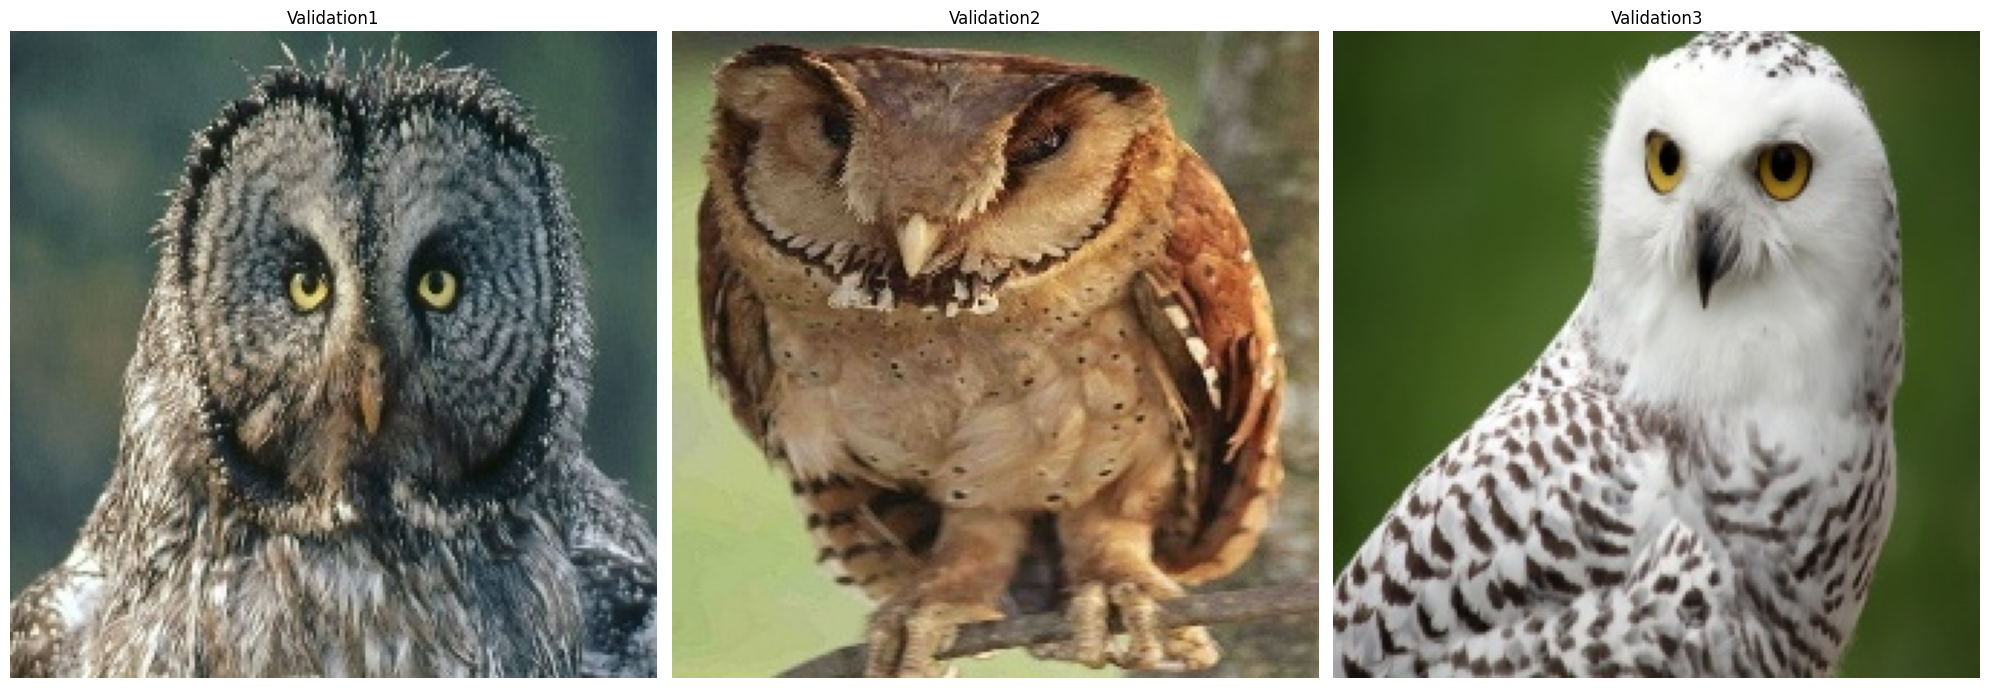

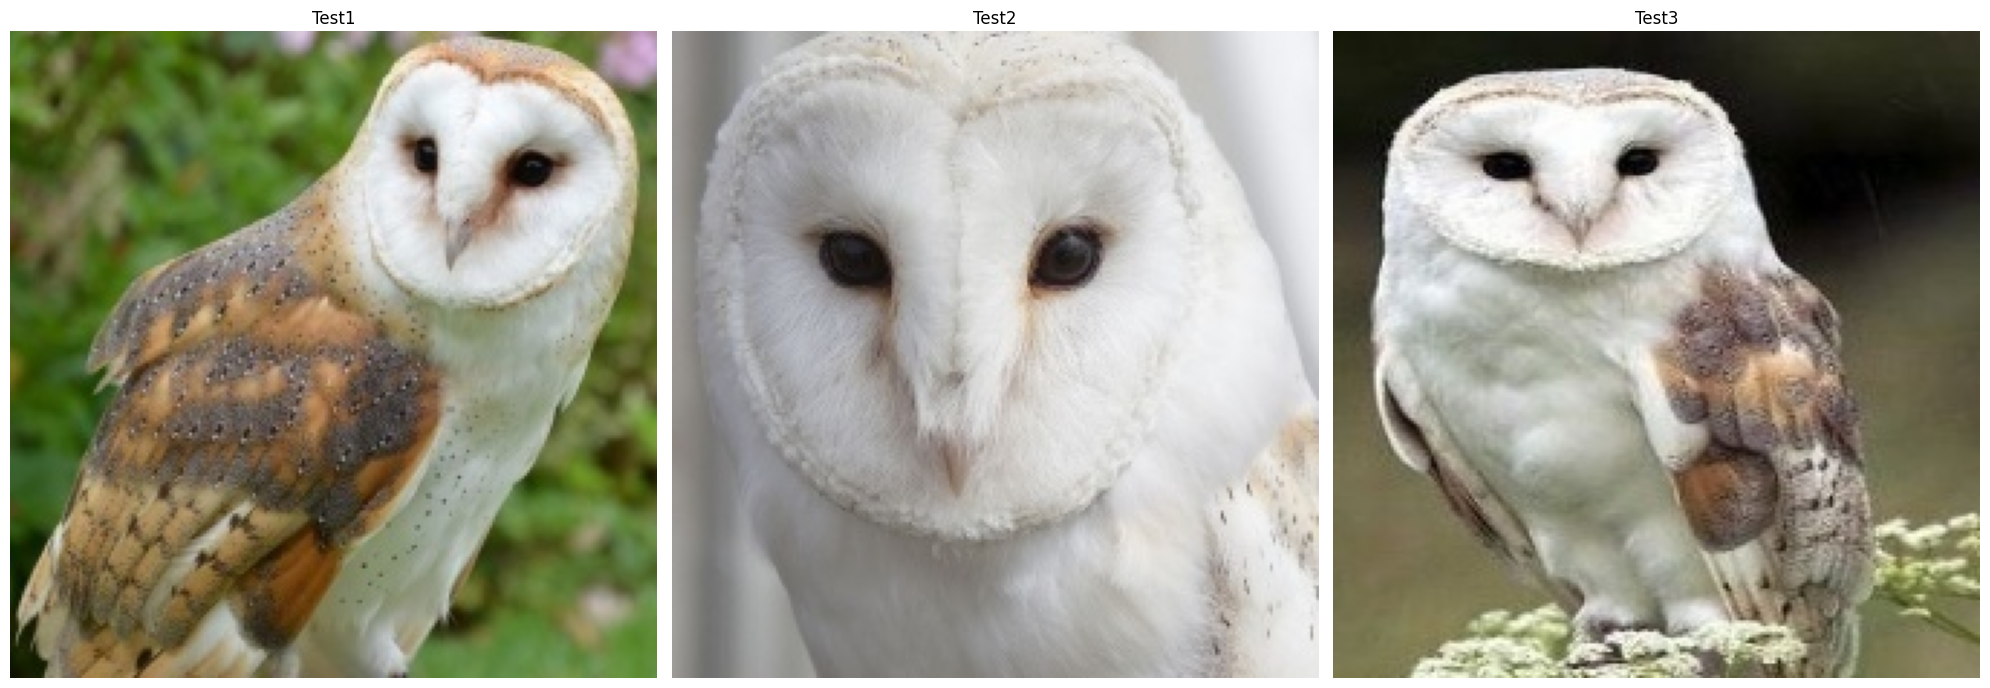

In [5]:
### data preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set some parameters
img_height, img_width = 224, 224
#batch_size = 32 ## need to change the batch size
batch_size = 128
# Set up the training, validation, and test directories
train_dir = '/content/drive/MyDrive/Machine learning project/OwlDetection/train'
validation_dir = '/content/drive/MyDrive/Machine learning project/OwlDetection/valid'
test_dir = '/content/drive/MyDrive/Machine learning project/OwlDetection/test'

# Set up data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Note that validation and test data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # 'categorical' because we have more than 2 classes
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data
)

# Helper function to plot images
def plot_images(images_arr, titles):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax, title in zip(images_arr, axes, titles):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Displaying images from each generator
# Extract and plot a batch from each
train_images, _ = next(train_generator)
validation_images, _ = next(validation_generator)
test_images, _ = next(test_generator)

# We take the first three images of the batch
plot_images(train_images[:3], ['Train1', 'Train2', 'Train3'])
plot_images(validation_images[:3], ['Validation1', 'Validation2', 'Validation3'])
plot_images(test_images[:3], ['Test1', 'Test2', 'Test3'])

<ipython-input-6-97ac9767a9d7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="plasma")


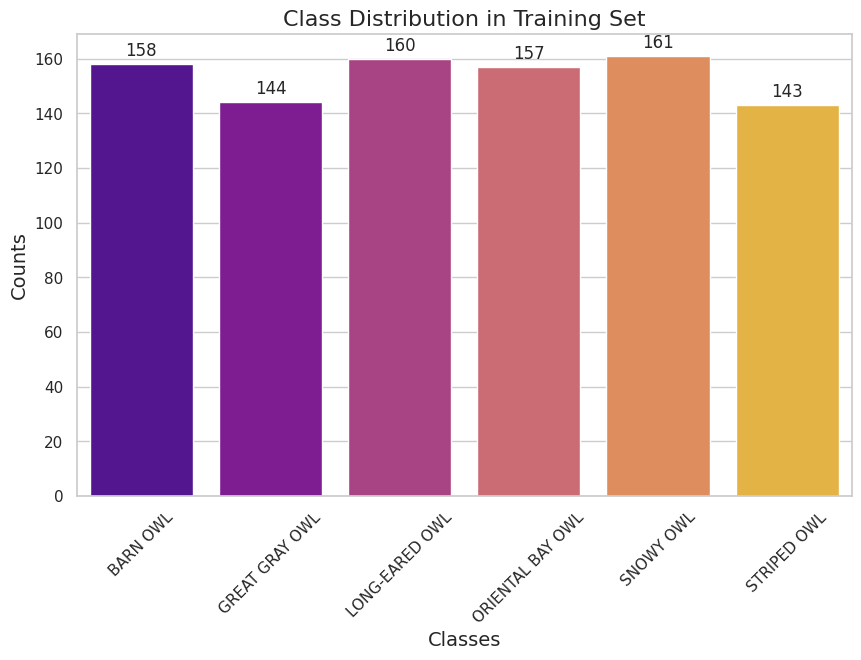

<ipython-input-6-97ac9767a9d7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="plasma")


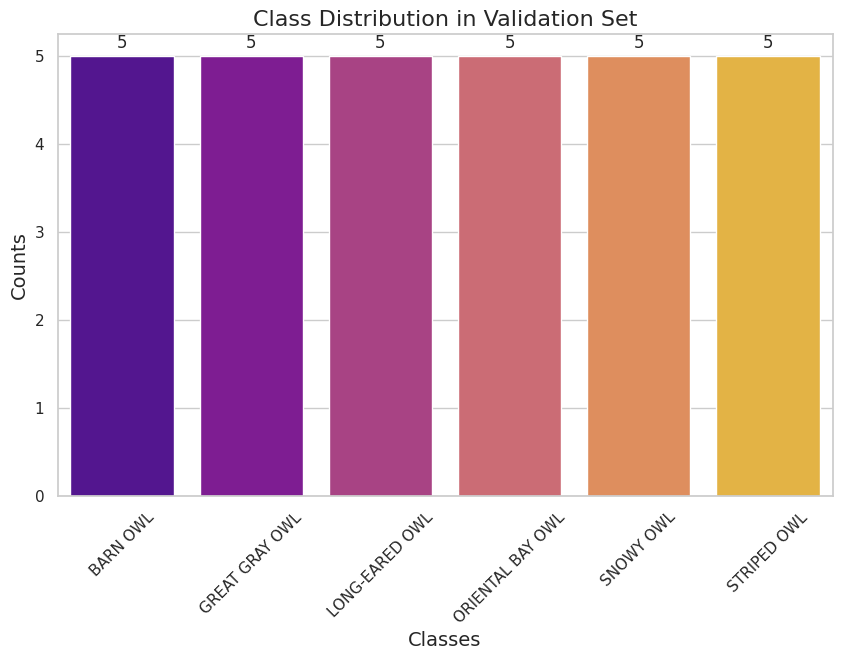

<ipython-input-6-97ac9767a9d7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="plasma")


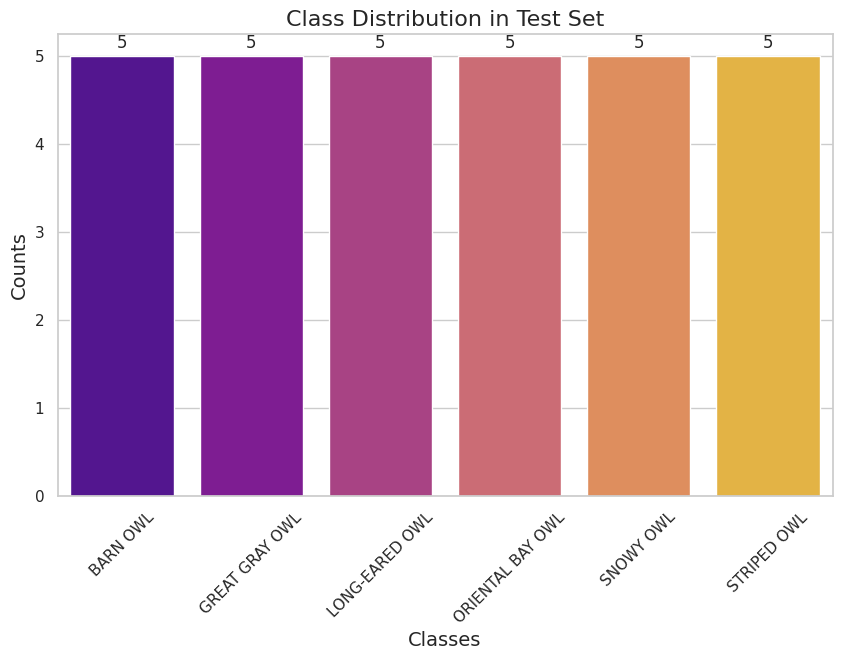

In [6]:
import seaborn as sns
# Get class counts for the training set
counts_train = np.bincount(train_generator.classes)
class_counts_train = {class_name: counts_train[class_idx] for class_name, class_idx in train_generator.class_indices.items()}

# Get class counts for the validation set
counts_validation = np.bincount(validation_generator.classes)
class_counts_validation = {class_name: counts_validation[class_idx] for class_name, class_idx in validation_generator.class_indices.items()}

# Get class counts for the test set
counts_test = np.bincount(test_generator.classes)
class_counts_test = {class_name: counts_test[class_idx] for class_name, class_idx in test_generator.class_indices.items()}
# Function to plot bar graph for class distribution
def plot_class_distribution(class_counts, title):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    # Set the style of the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Create a barplot
    ax = sns.barplot(x=labels, y=counts, palette="plasma")

    # Add title and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Counts', fontsize=14)

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    # Add counts above the bars
    for i in range(len(labels)):
        ax.text(i, counts[i] + max(counts)*0.01, counts[i], ha='center', va='bottom')

    # Show the plot
    plt.show()

# Plot class distribution for each set
plot_class_distribution(class_counts_train, 'Class Distribution in Training Set')
plot_class_distribution(class_counts_validation, 'Class Distribution in Validation Set')
plot_class_distribution(class_counts_test, 'Class Distribution in Test Set')


In [8]:
steps_per_epoch = train_generator.samples // batch_size
print('Steps per epoch:', steps_per_epoch)
epoch= 131
#how to deal with input ran out of data error. We need to make sure that total number of samples are greater than steps_per_epoch*epoch. Since we fixed our dataset then i will keep the epoch number fixed.
yy= steps_per_epoch * epoch
print ('step_per_epoch x epoch:', yy)
print('Total number of samples in the generator:', train_generator.samples)


Steps per epoch: 7
step_per_epoch x epoch: 917
Total number of samples in the generator: 923


In [9]:
%%time
#with learning rate schedule

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define the model
model = Sequential()

# Add the convolutional layer
# filters, size of filters, padding, activation_function, input_shape
model.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(img_height, img_width, 3), kernel_regularizer=regularizers.l2(0.01)))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Add another convolutional layer
model.add(Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Add another convolutional layer
model.add(Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Add another convolutional layer
model.add(Conv2D(256, (5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# Add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
num_classes = len(train_generator.class_indices)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

from tensorflow.keras.callbacks import EarlyStopping

# Define your early stopping criteria
earlystop = EarlyStopping(monitor='val_loss',  # Quantity to be monitored.
                          min_delta=0,  # Minimum change in the monitored quantity to qualify as an improvement.
                          patience=10,  # Number of epochs with no improvement after which training will be stopped.
                          verbose=1,  # Verbosity mode.
                          restore_best_weights=True)  # Whether to restore model weights from the epoch with the best value of the monitored quantity


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=131,  # the number of epochs to train for
    callbacks=[earlystop]  # Pass 'earlystop'  ' to the callbacks argument in your fit method.
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,924,934 (53.12 MB)

 Trainable params: 13,924,934 (53.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/131


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 480s 4s/step - accuracy: 0.1525 - loss: 10.1719 - val_accuracy: 0.1667 - val_loss: 9.7277
Epoch 2/131
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.2422 - loss: 9.7282

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2422 - loss: 9.7282 - val_accuracy: 0.1667 - val_loss: 9.6932
Epoch 3/131
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 307ms/step - accuracy: 0.1816 - loss: 9.6351 - val_accuracy: 0.1667 - val_loss: 9.4208
Epoch 4/131
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1719 - loss: 9.4092 - val_accuracy: 0.1667 - val_loss: 9.3788
Epoch 5/131
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - accuracy: 0.1788 - loss: 9.3011 - val_accuracy: 0.1333 - val_loss: 9.0723
Epoch 6/131
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2266 - loss: 9.0503 - val_accuracy: 0.1667 - val_loss: 9.0274
Epoch 7/131
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 293ms/step - accuracy: 0.2325 - loss: 8.9377 - val_accuracy: 0.2333 - val_loss: 8.7098
Epoch 8/131
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2734 - loss: 8.6828 - val_accuracy: 0.3000 - val_loss: 8.6643
Epoch 9/131
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - accuracy: 0.2170 - loss: 8.5749 - val_accuracy: 0.2667 - val_loss: 8.3

1/1 - 0s - 195ms/step - accuracy: 0.6333 - loss: 2.0236

Test accuracy: 0.6333333253860474


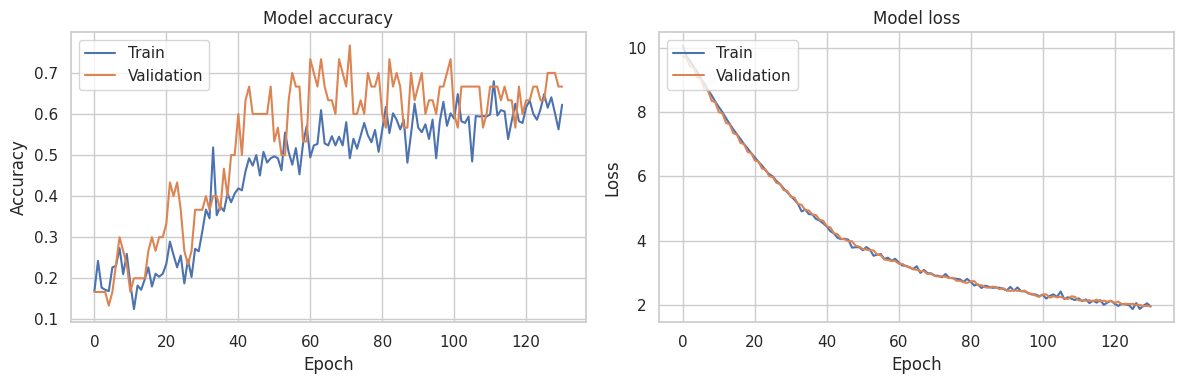

In [10]:
# Evaluate the model on the test data (model 02: more layers)
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

print('\nTest accuracy:', test_acc)
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


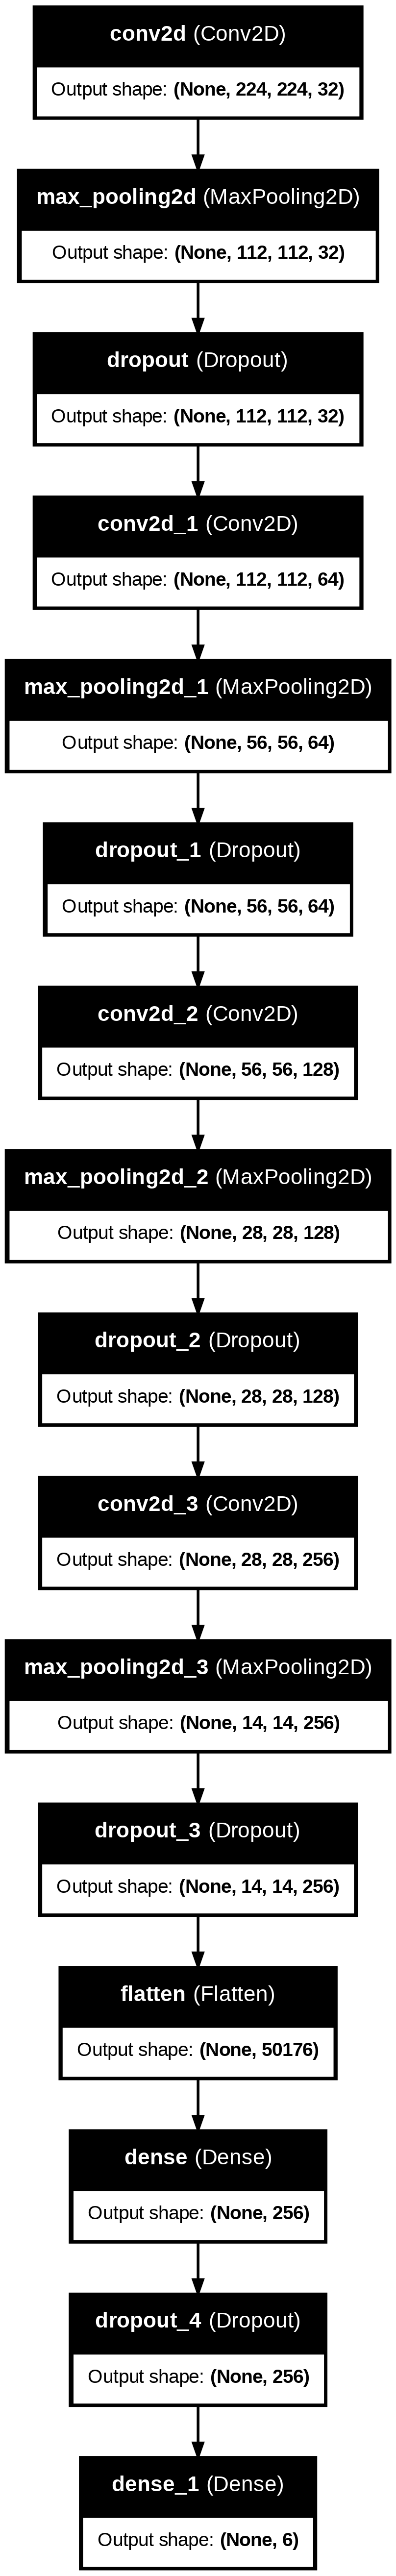

In [11]:
#Arhitecture of the model
from tensorflow.keras.utils import plot_model

# Assuming 'model' is the one you've trained
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



In [14]:
#classification report
from sklearn.metrics import classification_report
import seaborn as sns

# Get the model's predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the test data
true_classes = test_generator.classes

# Compute the classification report
report = classification_report(true_classes, predicted_classes)

print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.45      1.00      0.62         5
           2       1.00      0.40      0.57         5
           3       1.00      0.20      0.33         5
           4       0.62      1.00      0.77         5
           5       0.67      0.80      0.73         5

    accuracy                           0.63        30
   macro avg       0.79      0.63      0.60        30
weighted avg       0.79      0.63      0.60        30



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


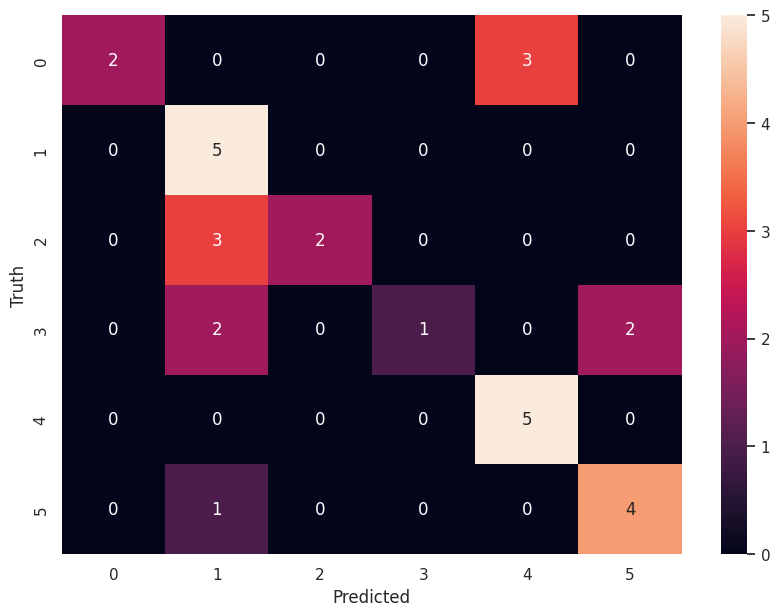

In [16]:

from sklearn.metrics import confusion_matrix
# Get the true labels
y_true = test_generator.classes

# Use the model to predict the labels
y_pred_proba = model.predict(test_generator)
# The model gives probabilities for each class, so we take the class with the highest probability
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
